## Transfer Learning Inception V3 using Keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip '/content/drive/My Drive/Project-Cotton Disease Data.zip'

Archive:  /content/drive/My Drive/Project-Cotton Disease Data.zip
  inflating: data/test/fresh cotton leaf/d (396).jpg  
  inflating: data/test/fresh cotton leaf/d (366).jpg  
  inflating: data/test/fresh cotton leaf/d (341).jpg  
  inflating: data/test/fresh cotton leaf/d (384).jpg  
  inflating: data/test/diseased cotton leaf/dis_leaf (124).jpg  
  inflating: data/test/fresh cotton leaf/d (378).jpg  
  inflating: data/test/diseased cotton plant/dd (706).jpg  
  inflating: data/test/diseased cotton leaf/dis_leaf (322).jpg  
  inflating: data/test/diseased cotton plant/dd (328).jpg  
  inflating: data/test/diseased cotton plant/dd (513).jpg  
  inflating: data/test/fresh cotton plant/dsd (632).jpg  
  inflating: data/test/fresh cotton plant/dsd (600).jpg  
  inflating: data/test/fresh cotton plant/dsd (405).jpg  
  inflating: data/test/diseased cotton plant/dd (367).jpg  
  inflating: data/test/test data comp files/dis_leaf (322)_compressed.jpg  
  inflating: data/test/test data comp f

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/data/train'
valid_path = '/content/data/val'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/data/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/data/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 34s 556ms/step - loss: 2.4448 - accuracy: 0.7355 - val_loss: 0.6615 - val_accuracy: 0.8858
Epoch 2/20
61/61 [==============================] - 32s 529ms/step - loss: 0.7030 - accuracy: 0.8780 - val_loss: 0.3787 - val_accuracy: 0.9383
Epoch 3/20
61/61 [==============================] - 32s 530ms/step - loss: 0.5667 - accuracy: 0.9006 - val_loss: 0.7765 - val_accuracy: 0.8858
Epoch 4/20
61/61 [==============================] - 32s 530ms/step - loss: 0.4441 - accuracy: 0.9211 - val_loss: 0.4189 - val_accuracy: 0.9475
Epoch 5/20
61/61 [==============================] - 32s 532ms/step - loss: 0.3495 - accuracy: 0.9441 - val_loss: 0.5245 - val_accuracy: 0.9228
Epoch 6/20
61/61 [==============================] - 32s 532ms/step - loss: 0.3540 - accuracy: 0.9370 - val_loss: 0.6701 - val_accuracy: 0.8951
Epoch 7/20
61/61 [==============================] - 32s 528ms/step

In [ ]:
import matplotlib.pyplot as plt

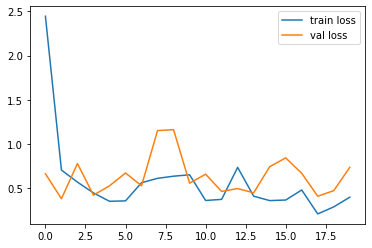

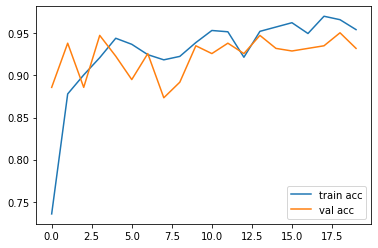

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/My Drive/Cotton Disease_inception.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[2.56434109e-14, 9.00480253e-20, 8.55554106e-07, 9.99999166e-01],
       [1.00000000e+00, 5.97246162e-22, 4.57167399e-13, 7.24024242e-18],
       [1.00000000e+00, 1.26386735e-23, 1.08303759e-14, 5.65412924e-14],
       ...,
       [0.00000000e+00, 1.00000000e+00, 1.19554615e-32, 2.17965297e-18],
       [0.00000000e+00, 1.00000000e+00, 6.60290675e-27, 6.37793221e-23],
       [1.19363711e-16, 3.76197502e-21, 9.98863697e-01, 1.13627606e-03]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([[2.56434109e-14, 9.00480253e-20, 8.55554106e-07, 9.99999166e-01],
       [1.00000000e+00, 5.97246162e-22, 4.57167399e-13, 7.24024242e-18],
       [1.00000000e+00, 1.26386735e-23, 1.08303759e-14, 5.65412924e-14],
       ...,
       [0.00000000e+00, 1.00000000e+00, 1.19554615e-32, 2.17965297e-18],
       [0.00000000e+00, 1.00000000e+00, 6.60290675e-27, 6.37793221e-23],
       [1.19363711e-16, 3.76197502e-21, 9.98863697e-01, 1.13627606e-03]],
      dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/My Drive/Cotton Disease_inception.h5')

In [ ]:
img=image.load_img('/content/data/test/test data comp files/d (384)_compressed.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[164., 210., 164.],
        [165., 211., 164.],
        [168., 214., 165.],
        ...,
        [174., 174., 172.],
        [170., 170., 168.],
        [167., 163., 160.]],

       [[163., 209., 163.],
        [167., 213., 166.],
        [171., 217., 168.],
        ...,
        [150., 150., 148.],
        [162., 162., 160.],
        [128., 124., 121.]],

       [[166., 212., 166.],
        [167., 213., 166.],
        [169., 215., 166.],
        ...,
        [119., 118., 116.],
        [144., 143., 141.],
        [115., 111., 108.]],

       ...,

       [[190., 230., 195.],
        [190., 230., 195.],
        [188., 228., 193.],
        ...,
        [130., 125., 121.],
        [131., 126., 122.],
        [138., 133., 129.]],

       [[187., 227., 192.],
        [184., 224., 189.],
        [184., 224., 189.],
        ...,
        [130., 125., 121.],
        [143., 138., 134.],
        [141., 133., 130.]],

       [[171., 211., 174.],
        [176., 216., 179.],
        [173., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[3.8425392e-01, 4.4677432e-05, 2.6658031e-01, 3.4912112e-01]],
      dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
print(a)